# Исследование данных об аренде самокатов и проверка гипотез

1. Контекст задачи: нам предоставлены данные о некоторых пользователях из нескольких городов, а также об их поездках.
2. Цель проекта: найти правдоподобные гипотезы, которые могут помочь бизнесу вырасти.
3. Наши задачи: выполнить предобработку данных, исследовательский анализ данных, объединить данные, проверить гипотезы.
4. Описание данных: В основных данных есть информация о пользователях, их поездках и подписках.

 ### Пользователи — users_go.csv

user_id	уникальный идентификатор пользователя

name	имя пользователя

age	возраст

city	город

subscription_type	тип подписки (free, ultra)

 ### Поездки — rides_go.csv

user_id	уникальный идентификатор пользователя

distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date	дата совершения поездки


 ### Подписки — subscriptions_go.csv

subscription_type	тип подписки

minute_price	стоимость одной минуты поездки по данной подписке

start_ride_price	стоимость начала поездки

subscription_fee	стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Загрузка данных и вводная информация

In [2]:
import os

pth1 = 'users_go.csv'
pth2 = '/datasets/users_go.csv'
if os.path.exists(pth1):
  users = pd.read_csv(pth1)
else:
  users = pd.read_csv(pth2)

pth1 = 'rides_go.csv'
pth2 = '/datasets/rides_go.csv'
if os.path.exists(pth1):
  rides = pd.read_csv(pth1)
else:
  rides = pd.read_csv(pth2)

pth1 = 'subscriptions_go.csv'
pth2 = '/datasets/subscriptions_go.csv'
if os.path.exists(pth1):
  subs = pd.read_csv(pth1)
else:
  subs = pd.read_csv(pth2)

In [3]:
display(users.head())
display(users.info())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

In [4]:
display(rides.head())
display(rides.info())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

In [5]:
display(subs.head())
display(subs.info())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

Изучили данные из файлов. Никаких проблем не заметили сразу, только несоответствующий тип данных в столбце date в датафрейма subs.

## Предобработка данных

### 

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Поменяли тип данных в столбце date, теперь жизнь явно лучше!

### 

In [7]:
rides['date_m'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,date_m
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Создали новый столбец "date_m" с номером месяца на основе столбца date.

Проверим так же, не "склеились" ли данные в случае, если нам дан не один год.

In [8]:
display(rides['date'].max())
display(rides['date'].min())
display(rides['date'].max() - rides['date'].min())

Timestamp('2021-12-30 00:00:00')

Timestamp('2021-01-01 00:00:00')

Timedelta('363 days 00:00:00')

Как можем заметить: все в порядке, нам дан практически весь 2021 год.

### 

In [10]:
print(users.isna().sum())
print(rides.isna().sum())
print(subs.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
date_m      0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Как можем заметить, никаких пропусков нет.

In [11]:
print(users.duplicated().sum())
print(rides.duplicated().sum())
print(subs.duplicated().sum())

31
0
0


Есть дубликаты, посмотрим их примеры.

In [12]:
users.loc[users.duplicated(), :].head(10)

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [13]:
users.loc[users.duplicated(keep = 'last'), :].head(10)

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
46,47,Юрий,28,Тюмень,ultra
71,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
120,121,Алина,25,Пятигорск,ultra
126,127,Павел,25,Пятигорск,ultra
135,136,Марсель,25,Тюмень,ultra
152,153,Герман,23,Москва,ultra
203,204,Руслан,30,Пятигорск,ultra


Можем увидеть как некоторые строки из этих списков повторяются. Достаточно было просто взять "первые" и "последние" дубликаты. Нужно удалить дублирающиеся строки.

In [14]:
users = users.drop_duplicates().reset_index(drop = True)

Удалили ненужные строки и вернули в порядок индексы.

In [15]:
users.duplicated().sum()

0

Проверили еще раз, для уверенности в правильности данных.

In [16]:
users_test = users.loc[:, :]
users_test['name'] = users_test['name'].str.lower()
users_test['city'] = users_test['city'].str.lower()
users_test.duplicated().sum()

0

Проверили на отсутствие неявных дубликатов.

## Исследовательский анализ данных

### Опишем и визуализируем общую информацию о пользователях и поездках:

#### Частота встречаемости городов

In [17]:
len(users['city'].unique())

8

In [18]:
city = users.groupby(['city']).count().sort_values(['user_id'], ascending = False)
city

,user_id,name,age,subscription_type
city,,,,
пятигорск,219,219,219,219
екатеринбург,204,204,204,204
ростов-на-дону,198,198,198,198
краснодар,193,193,193,193
сочи,189,189,189,189
омск,183,183,183,183
тюмень,180,180,180,180
москва,168,168,168,168


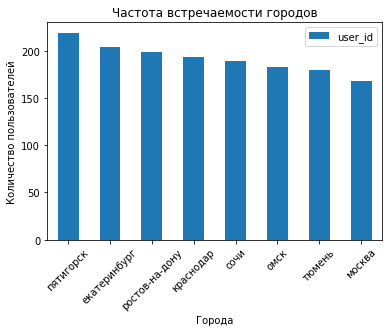

,user_id
city,
пятигорск,219
екатеринбург,204
ростов-на-дону,198
краснодар,193
сочи,189
омск,183
тюмень,180
москва,168


In [19]:
city.plot(y = 'user_id', kind = 'bar')
plt.xticks(rotation = 45)
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.show()

display(city.loc[:, :'user_id'])

Как можем заметить, больший спрос в городе Пятигорск. Далее идут такие города, как Екатеринбург, Ростов-на-Дону, Краснодар и остальные. Самым отстающим городом оказалась Моксва.

#### Соотношение пользователей с подпиской и без подписки

In [21]:
sub_type = users.groupby('subscription_type').count()
sub_type

,user_id,name,age,city
subscription_type,,,,
free,835,835,835,835
ultra,699,699,699,699


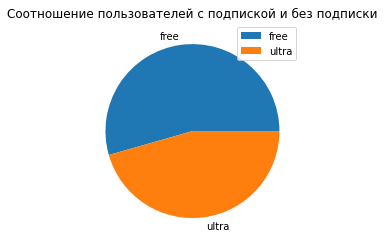

,user_id
subscription_type,
free,835
ultra,699


Пользователей без подписки: 835
Пользователей с подпиской: 699
Соотношение пользователей с подпиской и без подписки: 0.837125748502994


In [22]:
sub_type.plot(y = 'user_id', kind = 'pie')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')
plt.show()

display(sub_type.loc[:, :'user_id'])
print('Пользователей без подписки:', users.query('subscription_type == "free"').shape[0])
print('Пользователей с подпиской:', users.query('subscription_type == "ultra"').shape[0])
print('Соотношение пользователей с подпиской и без подписки:', users.query('subscription_type == "ultra"').shape[0] / users.query('subscription_type == "free"').shape[0])

Пользователей без подписки оказалось 835, с подпиской 699. Доля: 0.837

In [23]:
print('Пользователей без подписки:', users.query('subscription_type == "free"').shape[0])
print('Пользователей с подпиской:', users.query('subscription_type == "ultra"').shape[0])
print('Соотношение пользователей с подпиской и без подписки:', users.query('subscription_type == "ultra"').shape[0] / users.query('subscription_type == "free"').shape[0])

Пользователей без подписки: 835
Пользователей с подпиской: 699
Соотношение пользователей с подпиской и без подписки: 0.837125748502994


#### Возраст пользователей

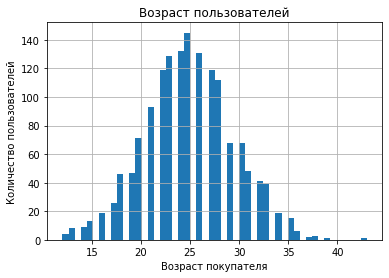

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [24]:
users['age'].hist(bins = 50)
plt.title('Возраст пользователей')
plt.xlabel('Возраст покупателя')
plt.ylabel('Количество пользователей')
plt.show()

display(users['age'].describe())

Основная часть данных имеет биноминальное распределение. Минимум: 12, максимум: 43. По графику видно, что есть выбросы после возраста примерно 38 лет. Большим спросом самокаты пользуются у людей возраста 22-28.

#### Расстояние, которое пользователь преодолел за одну поездку

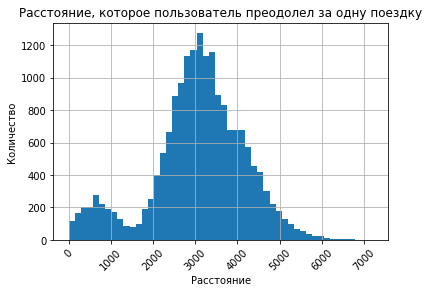

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [25]:
rides['distance'].hist(bins = 50)
plt.xticks(rotation = 45)
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.show()

display(rides['distance'].describe())

Основная часть данных имеет биноминальное распределение. Минимум: 0.85, максимум: 7211. На графике, что есть аномальное возрастание от 0 до 1000. В большинстве случаев пользователи проезжали около 3000-3200 метров.

#### Продолжительность поездок

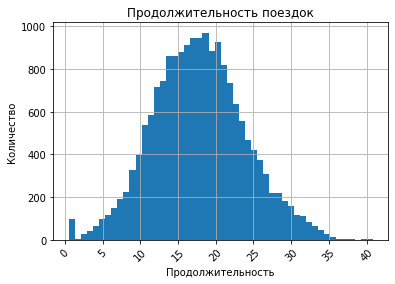

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [26]:
rides['duration'].hist(bins = 50)
plt.xticks(rotation = 45)
plt.xlabel('Продолжительность')
plt.ylabel('Количество')
plt.title('Продолжительность поездок')
plt.show()

display(rides['duration'].describe())

Основная часть данных имеет биноминальное распределение. Минимум: 0.5, максимум: 40.82. Есть выбросы до значения 5, скорее всего, это те поездки, которые были начаты и сразу же завершены по каким-то обстоятельствам. Чаще всего пользователи катались в районе 13-21 минут.

## Объединение данных

### 

Прежде чем соединять датафреймы, добавим в датафрейм о подписках новый столбец для упрощения соединения.

In [27]:
subs['subscription_type'] = ['free', 'ultra']
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [28]:
data = users.merge(rides, on = 'user_id', how = 'inner')
data = data.merge(subs, on = 'subscription_type', how = 'inner')

In [29]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_m,minute_price,start_ride_price,subscription_fee
0,1,кира,22,тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,кира,22,тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,кира,22,тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,кира,22,тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,кира,22,тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Соединили два датафрейма и проверили на правильность, рассмотрев первые пять строк.

### 

In [30]:
subs_no = data.query('subscription_type != "ultra"')
subs_yes = data.query('subscription_type == "ultra"')

In [31]:
display(subs_no.head())
display(subs_yes.head())

,user_id,name,age,city,subscription_type,distance,duration,date,date_m,minute_price,start_ride_price,subscription_fee
6500,700,айдар,22,омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,айдар,22,омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,айдар,22,омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,айдар,22,омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,айдар,22,омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,date_m,minute_price,start_ride_price,subscription_fee
0,1,кира,22,тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,кира,22,тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,кира,22,тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,кира,22,тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,кира,22,тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Создали два датафрейма:
* c данными о пользователях без подписки
* с данными о пользователях с подпиской

Проверим на размерность и пропуски эти датафреймы.

In [32]:
display(data.shape)
display(rides.shape)
display(subs_no.shape)
display(subs_yes.shape)
display(subs_no.shape[0] + subs_yes.shape[0])
display(data.isna().sum().any().any())
display(subs_yes.isna().sum().any().any())
display(subs_no.isna().sum().any().any())

(18068, 12)

(18068, 5)

(11568, 12)

(6500, 12)

18068

False

False

False

Как мы можем заметить, данные объединились правильно. Нет пропусков, и размерность совпадает.

### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

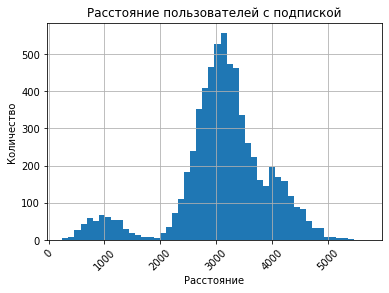

In [33]:
subs_yes['distance'].hist(bins = 50)
plt.xticks(rotation = 45)
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.title('Расстояние пользователей с подпиской')
plt.show()

Как можем заметить, пользователи с подпиской проезжают чаще всего около 3200 метров.

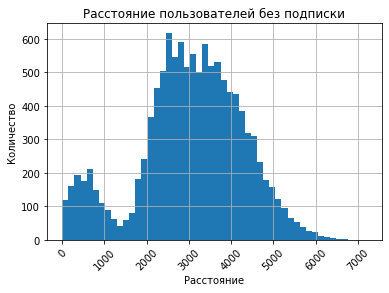

In [34]:
subs_no['distance'].hist(bins = 50)
plt.xticks(rotation = 45)
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.title('Расстояние пользователей без подписки')
plt.show()

Пользователи же без подписки проезжают обычно 2.5-3.5 км, но больше поездок все-таки около 2.5 км.

Соединим графики.

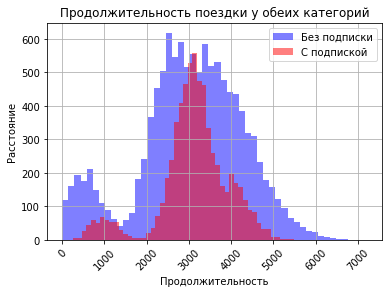

In [35]:
subs_no['distance'].hist(bins = 50, alpha = 0.5, color = 'blue', label = 'Без подписки')
subs_yes['distance'].hist(bins = 50, alpha = 0.5, color = 'red', label = 'С подпиской')
plt.xticks(rotation = 45)
plt.xlabel('Продолжительность')
plt.ylabel('Расстояние')
plt.title('Продолжительность поездки у обеих категорий')
plt.legend()
plt.show()

Распределения похожи, но у пользователей без подписки шире диапозон проезжаемого расстояния, поэтому график получился "толще".

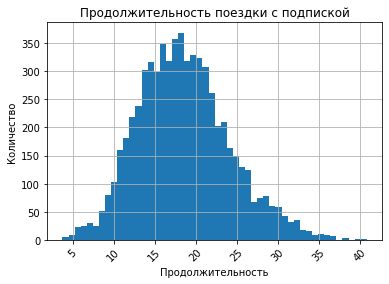

In [36]:
subs_yes['duration'].hist(bins = 50)
plt.xticks(rotation = 45)
plt.xlabel('Продолжительность')
plt.ylabel('Количество')
plt.title('Продолжительность поездки с подпиской')
plt.show()

А по времени можно сказать: в основном катаются около 18 минут.

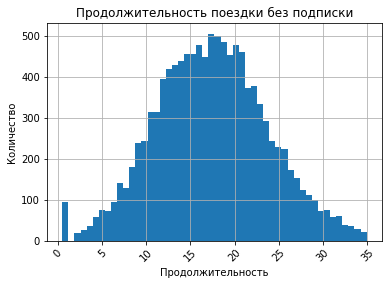

In [37]:
subs_no['duration'].hist(bins = 50)
plt.xticks(rotation = 45)
plt.xlabel('Продолжительность')
plt.ylabel('Количество')
plt.title('Продолжительность поездки без подписки')
plt.show()

Здесь же ситуация примерно такая же: в районе 17 минут.

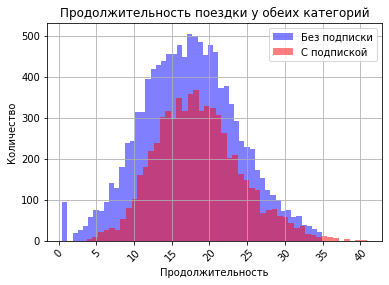

In [38]:
subs_no['duration'].hist(bins = 50, alpha = 0.5, color = 'blue', label = 'Без подписки')
subs_yes['duration'].hist(bins = 50, alpha = 0.5, color = 'red', label = 'С подпиской')
plt.xticks(rotation = 45)
plt.xlabel('Продолжительность')
plt.ylabel('Количество')
plt.title('Продолжительность поездки у обеих категорий')
plt.legend()
plt.show()

Можем увидеть нагляднее, у данных похожие распеределения, но пользователи без подписки либо катаются чаще, либо сказалась разница в количестве.

## Подсчёт выручки

### Создадим датафрейм с агрегированными данными о пользователях.


In [39]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_m,minute_price,start_ride_price,subscription_fee
0,1,кира,22,тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,кира,22,тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,кира,22,тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,кира,22,тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,кира,22,тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [40]:
data['duration'] = np.ceil(data['duration'])
data_agr = data.groupby(['user_id', 'date_m'])[['distance', 'duration', 'name', 'minute_price', 'start_ride_price', 'subscription_fee']].agg({'distance': 'sum', 'duration': 'sum', 'name': 'count', 'minute_price': 'mean', 'start_ride_price': 'mean', 'subscription_fee': 'mean'})
data_agr.head()

distance  duration  name  minute_price  start_ride_price  \
user_id date_m                                                                
1       1       7027.511294      42.0     2             6                 0   
        4        754.159807       7.0     1             6                 0   
        8       6723.470560      46.0     2             6                 0   
        10      5809.911100      32.0     2             6                 0   
        11      7003.499363      56.0     3             6                 0   

                subscription_fee  
user_id date_m                    
1       1                    199  
        4                    199  
        8                    199  
        10                   199  
        11                   199

Создали сгруппированный датафрейм, где посчитаны суммарные расстояния и время поездок.

### А теперь добавим в каждый созданный до этого датафрейм по одному столбцу с информацией о помесячном доходе от каждого клиента.

In [42]:
def income(row):
  return row['start_ride_price'] * row['name'] + row['minute_price'] * row['duration'] + row['subscription_fee']

In [43]:
data_agr['income'] = data_agr.apply(income, axis = 1)
display(data_agr.head())
display(data_agr.tail())

distance  duration  name  minute_price  start_ride_price  \
user_id date_m                                                                
1       1       7027.511294      42.0     2             6                 0   
        4        754.159807       7.0     1             6                 0   
        8       6723.470560      46.0     2             6                 0   
        10      5809.911100      32.0     2             6                 0   
        11      7003.499363      56.0     3             6                 0   

                subscription_fee  income  
user_id date_m                            
1       1                    199   451.0  
        4                    199   241.0  
        8                    199   475.0  
        10                   199   391.0  
        11                   199   535.0

distance  duration  name  minute_price  start_ride_price  \
user_id date_m                                                                 
1534    6        3409.468534      26.0     2             8                50   
        8        7622.453034      48.0     2             8                50   
        9        4928.173852      23.0     1             8                50   
        11      13350.015305      78.0     4             8                50   
        12       2371.711192      16.0     1             8                50   

                subscription_fee  income  
user_id date_m                            
1534    6                      0   308.0  
        8                      0   484.0  
        9                      0   234.0  
        11                     0   824.0  
        12                     0   178.0

Добавили в каждый датафрейм помесячную вырочку с каждого пользователя с разделением: с подпиской и без.

In [44]:
print(data_agr.loc[data_agr['subscription_fee'] == 199, 'income'].mean())
print(data_agr.loc[data_agr['subscription_fee'] != 199, 'income'].mean())

362.7921906022502
328.6413651073845


## Проверка гипотез

### 

Нулевая гипотеза: пользователи с подпиской тратят столько же времени, сколько и пользователи без подписки.

Альтернативная гипотеза: пользователи с подпиской тратят больше времени, чем пользователи без подписки.

In [45]:
from scipy import stats as st

time_subs = subs_yes['duration']
time_subs_no = subs_no['duration']
print('Среднее время пользователей с подпиской:', time_subs.mean())
print('Среднее время пользователей без подписки:', time_subs_no.mean())
alpha = 0.05
results = st.ttest_ind(time_subs, time_subs_no, alternative = 'greater')
print('p-value:', results.pvalue)
if results.pvalue > alpha:
  print('Не получилось отврегнуть нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

Среднее время пользователей с подпиской: 18.54198516280583
Среднее время пользователей без подписки: 17.39090929866399
p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


p-value слишком маленький, но на всякий случай проверим и при альфе равной 1%.

In [46]:
alpha = 0.01
results = st.ttest_ind(time_subs, time_subs_no, alternative = 'greater')
if results.pvalue > alpha:
  print('Не получилось отврегнуть нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу в пользу альтернативной гипотезе. То есть о том, что пользователи с подпиской тратят больше времени на поездки.

### 

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров
.
Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не больше, чем 3130 метров.

In [47]:
sample = subs_yes['distance']
value = 3130
results = st.ttest_1samp(sample, value, alternative = 'less')
print('p-value', results.pvalue)
if results.pvalue > alpha:
  print('Не получилось отвергнуть нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

p-value 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


Следовательно, нельзя наверняка сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Поэтому проверим иную альтернативную гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [48]:
sample = subs_yes['distance']
value = 3130
results = st.ttest_1samp(sample, value, alternative = 'greater')
print('p-value', results.pvalue)
if results.pvalue > alpha:
  print('Не получилось отвергнуть нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

p-value 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Все-таки нулевую гипотезу в пользу альтернативной так и не удалось отвергнуть. Следовательно, средняя поездка не превышает 3130 метров, а самокаты износятся в меру.

### 

Нулевая гипотеза: помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей с без подписки.

In [49]:
sample1 = data_agr.query('subscription_fee == 199')['income']
sample2 = data_agr.query('subscription_fee != 199')['income']
alpha = 0.05
results = st.ttest_ind(sample1, sample2, alternative = 'greater')
print('p-value:', results.pvalue)
if results.pvalue > alpha:
  print('Не получилось отвергнуть нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о том, что помесячные выручки от пользователей с подпиской и без равны, в пользу альтернативной, выручка от пользователей с подпиской выше.

In [50]:
sample1 = data_agr.query('subscription_fee == 199')['income']
sample2 = data_agr.query('subscription_fee != 199')['income']
alpha = 0.01
results = st.ttest_ind(sample1, sample2, alternative = 'greater')
print('p-value:', results.pvalue)
if results.pvalue > alpha:
  print('Не получилось отвергнуть нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


### 

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Понадобился бы двухвыборочный t-тест для зависимых выборок(в коде: st.ttest_rel(sample1, sample2, alternative = 'else'(если sample1 - это измененная выборка)/). Поскольку у нас есть всего одна выборка, которая понесла изменения.

# Вывод

* Нам был дан кейс, и мы провели предобратку данных, небольшой исследовательный анализ, а также сделали проверку гипотез. Проведя предобработку данных были замечены дубликаты. От них мы избавились путем удаления повторяющихся строк. Также было замечен несоответсвующий тип данных столцба "date" в датафрейме "rides". Благополучно заменили на нужный. Проверили также на пропуски и неявные дубликаты, их не оказалось. В ходе исследовательского анализа данных выяснили, что город, в котором самый высокий спрос на самокаты - это Пятигорск, а меньше всего спроса в городе Москва. Выяснили соотношение пользователей с подпиской и без нее: 0,837. Большим спросом самокаты пользуются у людей возраста 22-28. В среднем пользователи проезжают около 2,5-3,5 км. А их средняя продолжительность поездки: 13-21 минут. Объяединив данные, проверили на правильность соединения: пропусков нет, и размерность оказалась правильной. Визуализировав их, выяснили, что пользователи с подпиской проезжают чаще расстояние в 3,2 км, а люди без подписки около 2,5 км. А также первые чаще проезжают 18 минут, без подписки - 17 минут. Далее мы добавили новые столбцы с помесячной выручкой с каждого пользователя: с подпиской и без нее. После приступили к проверке гипотез, которые могут положительно сказаться на бизнесе. Гипотезы, к которым не вышло склониться:

1. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не больше, чем 3130 метров.


* В итоге проделанной работы мы определили гипотезы, в пользу которых можно отнестись.

* Рекомендации для заказчиков. Гипотезы, на которые стоит обратить внимание:

1.   Пользователи с подпиской тратят больше времени, чем пользователи без подписки.
2. Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей с без подписки.